## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Import necessary modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import re
%matplotlib inline

In [2]:
# Import files into Jupyter notebook

bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv') # Mustafa

imdb_name_basics = pd.read_csv('data/imdb.name.basics.csv') # Andy
imdb_title_akas = pd.read_csv('data/imdb.title.akas.csv') # Mustafa
imdb_title_basics = pd.read_csv('data/imdb.title.basics.csv') # Andy
imdb_title_crew = pd.read_csv('data/imdb.title.crew.csv') # Mustafa
imdb_title_principles = pd.read_csv('data/imdb.title.principals.csv') # Chris
imdb_title_ratings = pd.read_csv('data/imdb.title.ratings.csv') # Chris

rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', sep='\t') # Mustafa
rt_reviews = pd.read_csv('data/rt.reviews.tsv', sep='\t', encoding= 'unicode_escape') # Chris

tmdb_movies = pd.read_csv('data/tmdb.movies.csv') # Andy

tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv') # Andy

In [ ]:
imdb_title_akas.set_index('title', inplace=True)
tmdb_movies.set_index('title', inplace=True)

In [ ]:
imdb_akas_tmdb_movies = imdb_title_akas.merge(tmdb_movies, on='title', how='inner')
x= imdb_akas_tmdb_movies.groupby('title').mean().sort_values(by='vote_count', ascending = False)
x = x[(x['vote_average'] > 7.5) & (x['vote_count'] > 5000) ]
#imdb_akas_tmdb_movies.sort_values(by='vote_count', ascending = False).iloc[0:4000]

In [158]:
def strtofloat(x):
    if ',' in x:
        x = x.replace(',', '')
        x = float(x)* 1000000
        return x
    else:
        x = float(x)
        return x
    
#strtofloat("1,131.6") 
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].map(lambda x: strtofloat(x) if type(x) == str else x)
# bom_movie_gross['foreign_gross'].map(lambda x: type(x))
# bom_movie_gross['foreign_gross'][1872]
#bom_movie_gross.sort_values('domestic_gross', ascending = False).info()

Text(0, 0.5, 'Dollars in hundred million')

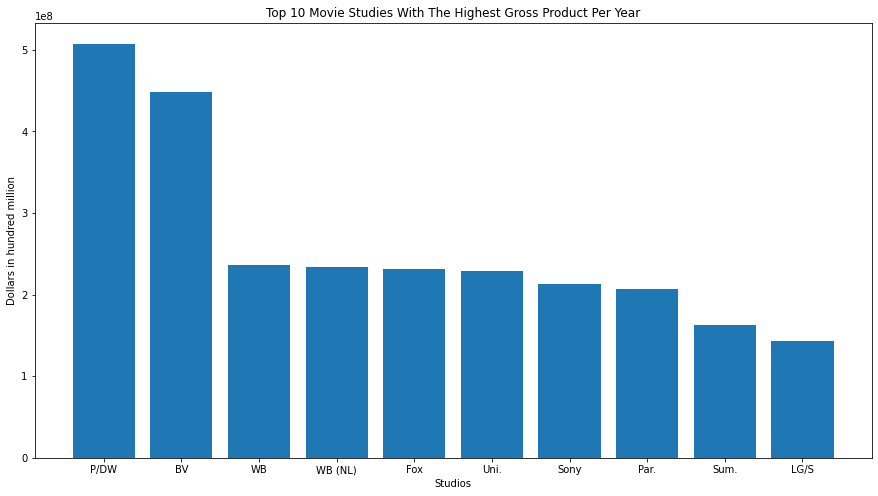

In [159]:
# All missing value rows dropped 
bom_movie_gross_dropped = bom_movie_gross.dropna()
# BOXPLOT OF NUM OF MOVIES PER DIRECTOR
#fig,ax = plt.subplots(figsize=(15,8))
#ax.boxplot(bom_movie_gross_dropped['studio'].value_counts().values, vert=False)

# OBTAIN DESCRIPTIVE STATISTICS OF NUM OF MOVIES PER DIRECTOR
bom_movie_gross_dropped['studio'].value_counts().describe()

# EXTRACT STUDIOS WITH THREE OR MORE MOVIES INTO A LIST
threeplusmoviestudios = [movie for movie in bom_movie_gross_dropped['studio'].value_counts().index if bom_movie_gross_dropped['studio'].value_counts()[movie] >= 3]

# FILTER DATAFRAME SO THAT ONLY MOVIES MADE BY STUDIOS WITH THREE OR MORE MOVIES ARE DISPLAYED
bom_movie_gross_dropped = bom_movie_gross_dropped[bom_movie_gross_dropped['studio'].isin(threeplusmoviestudios)]

# ADD A COLUMN TO DATAFRAME WHICH HAS THE TOTAL GROSS OF EACH MOVIE IN THE DATAFRAME
bom_movie_gross_dropped['total_gross'] = bom_movie_gross_dropped['domestic_gross']  + bom_movie_gross_dropped['foreign_gross'] 

# FIND AVERAGE TOTAL GROSS OF STUDIOS AND EXTRACT THE 10 STUDIOS WITH THE HIGHEST AVERAGE TOTAL GROSS 
bom_movie_gross_filtered = bom_movie_gross_dropped.groupby('studio').mean().sort_values('total_gross', ascending=False).iloc[0:10]

# ONLY KEEP THE STUDIO AND TOTAL GROSS COLUMNS
bom_movie_gross_filtered = bom_movie_gross_filtered['total_gross']
bom_movie_gross_filtered

fig,ax = plt.subplots(figsize=(15,8))
ax.bar(bom_movie_gross_filtered.index, bom_movie_gross_filtered)
ax.set_title("Top 10 Movie Studies With The Highest Gross Product Per Year")
ax.set_xlabel("Studios")
ax.set_ylabel("Dollars in hundred million")

In [157]:
imdb_title_basics_and_title_ratings = imdb_title_basics.merge(imdb_title_ratings, on='tconst', how='inner')
# imdb_title_basics_and_title_ratings_filtered = imdb_title_basics_and_title_ratings[imdb_title_basics_and_title_ratings['averagerating']>8]
# imdb_title_basics_and_title_ratings_sorted = imdb_title_basics_and_title_ratings.sort_values('numvotes', ascending=False)
# imdb_title_basics_and_title_ratings_groupbygenre = imdb_title_basics_and_title_ratings.groupby('genres').mean()
# x = imdb_title_basics_and_title_ratings_groupbygenre.sort_values('averagerating', ascending=False)
# x[x['numvotes'] > 1000]
genre_value_counts = imdb_title_basics_and_title_ratings['genres'].value_counts()
genre_value_counts.describe()

#genre_value_counts.values
# fiveplusmoviegenres = [genre for genre in genre_value_counts.index if genre_value_counts[genre] > 5]
# df = imdb_title_basics_and_title_ratings.copy()
# df[df['genres'].isin(fiveplusmoviegenres)]

# imdb_title_basics_and_title_ratings['genres'].value_counts()


#imdb_title_basics_and_title_ratings_sorted['genres'].value_counts()
# imdb_dict = imdb_title_basics_and_title_ratings_sorted['genres'].value_counts().to_dict()
# imdb_title_basics_and_title_ratings_sorted
# new_dict = {}
# for k,v in imdb_dict.items():
#     temp = k.split(',')
#     for t in temp:
#         if t not in new_dict:
#             new_dict[t] = v
#         else: 
#             new_dict[t] += v

# fig,ax = plt.subplots(figsize=(20,8))
# ax.bar(list(new_dict), list(new_dict.values()))
# ax.set_title("Frequency of Genres in Top 1000 Most Voted movies")
# ax.set_xlabel("Genres")
# ax.set_ylabel("Frequency")

count      923.000000
mean        79.146262
std        569.411161
min          1.000000
25%          2.000000
50%          5.000000
75%         29.000000
max      11612.000000
Name: genres, dtype: float64

# Genre vs Profits

In [ ]:
# MERGE imdb_title_basics WHICH HAS GENRE INFO ON MOVIES WITH tn_movie_budgets
df = imdb_title_basics.merge(tn_movie_budgets, left_on='primary_title', right_on='movie')
# KEEP GENRES AND FINANCIAL COLUMNS ONLY AND DROP THE OTHERS
df = df[['genres','production_budget','domestic_gross','worldwide_gross']]
# DROP THE MOVIES WHICH HAVE UNDEFINED GENRES
df = df.dropna()
df.info()
# df.info() tells us that production_budget, domestic_gross and worldwide_gross columns are objects. We need to 
# convert these columns to int in order to calculate total revenue of each movie

df['production_budget'] = df['production_budget'].map(lambda x: int(x.replace(',', '').replace('$', '')))
df['domestic_gross'] = df['domestic_gross'].map(lambda x: int(x.replace(',', '').replace('$', '')))
df['worldwide_gross'] = df['worldwide_gross'].map(lambda x: int(x.replace(',', '').replace('$', '')))

# MAKE A NEW COLUMN TOTAL_GROSS THAT CONTAINS THE TOTAL REVENUE OF EACH MOVIE
df['total_gross'] = df['domestic_gross'] + df['worldwide_gross']
# MAKE A NEW COLUMN PROFIT THAT CONTAINS THE PROFIT OF EACH MOVIE
df['profit'] = df['total_gross'] - df['production_budget']
# SORT DATAFRAME BASED ON PROFIT
df = df.sort_values('profit', ascending=False).iloc[0:2483]
df

In [ ]:
imdb_title_basics['primary_title'] = imdb_title_basics['primary_title'].map(lambda x: re.sub('[.,:-]', '', x)) 
tn_movie_budgets['movie'] = tn_movie_budgets['movie'].map(lambda x: re.sub('[.,:-]', '', x))
imdb_title_basics['primary_title'].iloc[41443]

Text(0, 0.5, 'Frequency')

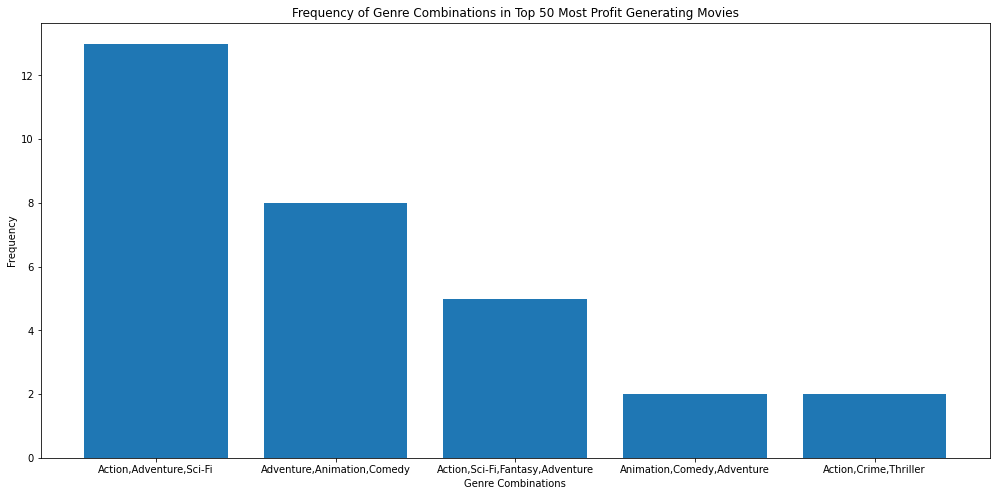

In [151]:
imdb_title_basics['primary_title'] = imdb_title_basics['primary_title'].map(lambda x: re.sub('[.,:-]', '', x)) 
tn_movie_budgets['movie'] = tn_movie_budgets['movie'].map(lambda x: re.sub('[.,:-]', '', x))

# MAKE A COLUMN called release_date_year WHICH HOLDS THE YEAR OF EACH MOVIE in tn_movie_budgets dataframe
tn_movie_budgets['release_date_year'] = tn_movie_budgets['release_date'].map(lambda x: x[-4:])
# MAKE A COLUMN called movie_and_year WHICH HOLDS THE CONCATENATED VERSION OF MOVIE AND YEAR OF EACH MOVIE 
tn_movie_budgets['movie_and_year'] = tn_movie_budgets['movie'] + tn_movie_budgets['release_date_year']
# CONVERT START YEAR TO string 
imdb_title_basics['start_year_str'] = imdb_title_basics['start_year'].map(str)
# MAKE A COLUMN called movie_and_year WHICH HOLDS THE CONCATENATED VERSION OF TITLE AND YEAR OF EACH MOVIE 
imdb_title_basics['title_and_year'] = imdb_title_basics['primary_title'] + imdb_title_basics['start_year_str']



df = tn_movie_budgets.merge(imdb_title_basics, how='left', left_on='movie_and_year', right_on='title_and_year')
df['production_budget'] = df['production_budget'].map(lambda x: int(x.replace(',', '').replace('$', '')))
df['domestic_gross'] = df['domestic_gross'].map(lambda x: int(x.replace(',', '').replace('$', '')))
df['worldwide_gross'] = df['worldwide_gross'].map(lambda x: int(x.replace(',', '').replace('$', '')))
# MAKE A NEW COLUMN TOTAL_GROSS THAT CONTAINS THE TOTAL REVENUE OF EACH MOVIE
df['total_gross'] = df['domestic_gross'] + df['worldwide_gross']
# MAKE A NEW COLUMN PROFIT THAT CONTAINS THE PROFIT OF EACH MOVIE
df['profit'] = df['total_gross'] - df['production_budget']
# SORT DATAFRAME BASED ON PROFIT
df = df.sort_values('profit', ascending=False)
# HARDCODE MISSING GENRES FOR THE TOP 50 MOVIES WITH LARGEST PROFITS
df['genres'].iloc[0] = 'Action,Sci-Fi,Fantasy,Adventure'
df['genres'].iloc[1] = 'Action,Sci-Fi,Fantasy,Adventure'
df['genres'].iloc[2] = 'Romance,Drama'
df['genres'].iloc[9] = 'Action,Sci-Fi,Fantasy,Adventure'
df['genres'].iloc[11] = 'Drama,Fantasy,Adventure'
df['genres'].iloc[15] = 'Action,Drama,Fantasy,Adventure'
df['genres'].iloc[18] = 'Action,Sci-Fi,Fantasy,Adventure'
df['genres'].iloc[21] = 'Action,Fantasy,Adventure'
df['genres'].iloc[22] = 'Action,Adventure,Drama'
df['genres'].iloc[23] = 'Animation,Drama,Adventure'
df['genres'].iloc[25] = 'Animation,Comedy,Adventure'
df['genres'].iloc[32] = 'Animation,Comedy,Adventure,Fantasy'
df['genres'].iloc[34] = 'Action,Sci-Fi,Fantasy,Adventure'
df['genres'].iloc[36] = 'Animation,Comedy,Adventure'
df['genres'].iloc[37] = 'Adventure,Sci-Fi,Drama,Action,Fantasy'
df['genres'].iloc[41] = 'Action,Adventure,Drama,Fantasy'
df['genres'].iloc[43] = 'Adventure,Fantasy'
df['genres'].iloc[49] = 'Action, Adventure, Fantasy'
# HARDCODE MISSING GENRES FOR THE TOP 50 MOVIES WITH LARGEST PROFITS
top_50_movies = df.iloc[0:50]
top_50_movies_genre_distribution = top_50_movies['genres'].value_counts()
top_50_movies_genre_distribution

# TAKE THE TOP 5 GENRE COMBINATIONS 
top_5_genre_combinations = top_50_movies_genre_distribution[0:5]

fig,ax = plt.subplots(figsize=(17,8))
ax.bar(top_5_genre_combinations.index, top_5_genre_combinations.values)
ax.set_title("Frequency of Genre Combinations in Top 50 Most Profit Generating Movies")
ax.set_xlabel("Genre Combinations")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

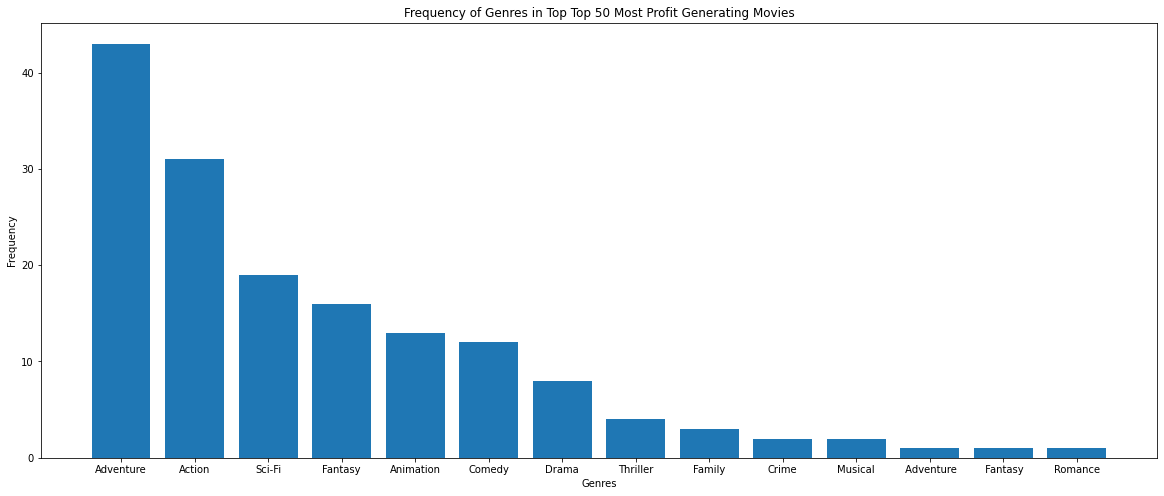

In [155]:
top_50_movies_genre_distribution
top_50_movies_genre_distribution_dict = top_50_movies_genre_distribution.to_dict()
top_50_movies_genre_distribution_dict
new_dict = {}
for k,v in top_50_movies_genre_distribution_dict.items():
    temp = k.split(',')
    for t in temp:
        if t not in new_dict:
            new_dict[t] = v
        else: 
            new_dict[t] += v
new_dict = {k: v for k, v in sorted(new_dict.items(), key=lambda x: x[1], reverse=True)}
new_dict

fig,ax = plt.subplots(figsize=(20,8))
ax.bar(list(new_dict), list(new_dict.values()))
ax.set_title("Frequency of Genres in Top Top 50 Most Profit Generating Movies")
ax.set_xlabel("Genres")
ax.set_ylabel("Frequency")